In [1]:
!pip install decord


In [1]:
import torch
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tqdm, time
import heapq
import datetime
import glob
import random,time
import decord as de
import math
import os
from glob import glob
from functools import partial
# import skvideo.io
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import *
%matplotlib inline

In [3]:
%cd /content/drive/MyDrive/Dataset/innovative_skills_work

/content/drive/MyDrive/Dataset/innovative_skills_work


In [4]:
!ls

Assignment  Lecture_1_data_loader.ipynb


# Creating the pipeline

In [5]:
# data_path = np.sort(np.array(glob('/content/drive/MyDrive/Dataset/innovative_skills_work/Assignment/*')))
# data_path

# image_files = np.sort(np.array(glob('/content/drive/MyDrive/Dataset/innovative_skills_work/Assignment/*')))

image_files = np.sort(np.array(glob('./Assignment/*')))
image_files

array(['./Assignment/n01440764', './Assignment/n01443537',
       './Assignment/n01484850', './Assignment/n01491361',
       './Assignment/n01494475', './Assignment/n01496331'], dtype='<U22')

In [6]:
len(image_files)

6

In [7]:
def label_image(data_path):
    kw = []
    kb = []

    for j in range(len(data_path) // 1):
        img = np.sort(np.array(glob(data_path[j]+'/*')))
        random.shuffle(img)

        for i in range(len(img) // 1):

            kw.append(img[i])
            kb.append(j)

    return np.array(kw), np.array(kb)

In [8]:
img, label = label_image(image_files)

In [20]:
len(img), len(label)

(180, 180)

In [10]:
img_pipline = tf.data.Dataset.from_tensor_slices((img, label)).batch(64).shuffle(50000)

In [ ]:
a1, a2 = next(iter(img_pipline))
print(a1, a2)


In [13]:
# onehot encoding

label_1 = to_categorical(label, len(np.unique(label)))



img_pipeline_1 = tf.data.Dataset.from_tensor_slices((img, label_1)).batch(32).shuffle(50000)

In [ ]:
# onehot encoded output

a1, a2 = next(iter(img_pipeline_1))
print(a1, a2)

In [65]:
# for i in range(50):
#     print(img[i], label[i])

# Creating the Image data loader

In [88]:
def image_dataloader(image, label, batch_size, n_class,  shuffle=True, toption = True ):

        """
        Creates a custom image data loader

        arguements: image: all image file locations
                    label: labels of the corresponding images
                    batch_size: the number of images in every batch
                    n_class: number of classes/labels
                    shuffle: to shuffle the images or not, default=True
                    toption: to normalize the image between 0 to 1 or -1 to 1, default=True (normalize between 0 to 1)

        returns: yields image, labels
        """
        num_samples = len(image) # 180

        pairs = list(zip(image, label)) # image path, corresponding indices

        if shuffle:
            random.shuffle(pairs)


        for offset in range(0, num_samples, batch_size):    # (0, 100, step=batch_size=32)
                #print ('startring index: ', offset)
                # Get the samples you'll use in this batch


                im_batch = np.array(pairs[offset:offset+batch_size]) [:,0] # take everything from 0th column from offset to offset + batch_size
                lb_batch = np.array(pairs[offset:offset+batch_size]) [:,1] # take everything from 0th column from offset to offset + batch_size



                # Initialise X_train and y_train arrays for this batch
                X_train = []
                y_train = []
                # For each example
                for (sample1,sample2)  in zip(im_batch, lb_batch):

                    if str(sample2.dtype) =='<U9':
                        sample2 = sample2
                    else:
                        sample2 = to_categorical(sample2, n_class)

                    # rdr =  de.VideoReader(sample1, width=224, height=224, ctx=cpu(0))
                    # d1 =   rdr.get_batch(range(0, len(rdr) - 1, 3)).asnumpy()
                    array = cv2.imread(sample1)
                    im = cv2.cvtColor(array, cv2.COLOR_BGR2RGB)/255

                    # video_clip = get_clip(d1, frame_count, intrvl)


                    if toption:
                         X_train.append(  tf.image.resize(im,[128,128])  )
                         #X_train.append(  tf.image.per_image_standardization(video_clip)  )
                    else:
                         X_train.append(  (tf.image.resize(im,[128,128]))/255  )

                    y_train.append(sample2)



                # Make sure they're numpy arrays (as opposed to lists)
                X_train = np.array(X_train)

                y_train = np.array(y_train)

                yield X_train, y_train

In [89]:
bs = 16 # batch size
n_cls = np.max(label) + 1   # number of classes, in this case 6

im_ds = image_dataloader(img, label, bs, n_cls, shuffle=True)

In [90]:
load_image, load_label = next(iter(im_ds))
print(load_image.shape, load_label.shape)

(16, 128, 128, 3) (16, 6)


In [99]:
print(a1[0], a2[0])

[[[0.85490197 0.8754902  0.8666667 ]
  [0.80784315 0.8068628  0.7921569 ]
  [0.6245098  0.62254906 0.57058823]
  ...
  [0.47843137 0.5411765  0.31666666]
  [0.45392156 0.40784314 0.34705883]
  [0.3362745  0.32352942 0.2529412 ]]

 [[0.64705884 0.6313726  0.627451  ]
  [0.6450981  0.6529412  0.6509804 ]
  [0.5529412  0.52647066 0.45784312]
  ...
  [0.45       0.52647066 0.33039218]
  [0.41274512 0.39019608 0.28725493]
  [0.35882354 0.32352942 0.25882354]]

 [[0.6696079  0.71274513 0.58137256]
  [0.6245098  0.68039215 0.5107843 ]
  [0.5852941  0.6245098  0.46078432]
  ...
  [0.40784314 0.4009804  0.25588238]
  [0.35000002 0.31862748 0.21470588]
  [0.36862746 0.3245098  0.2519608 ]]

 ...

 [[0.33333334 0.3009804  0.22745098]
  [0.24509805 0.22549021 0.16568628]
  [0.31862748 0.26666668 0.20588237]
  ...
  [0.16764706 0.13431373 0.00294118]
  [0.16862746 0.27254903 0.04705882]
  [0.33529413 0.34411764 0.10882354]]

 [[0.46274513 0.44117647 0.37254903]
  [0.34509805 0.25490198 0.23333333]


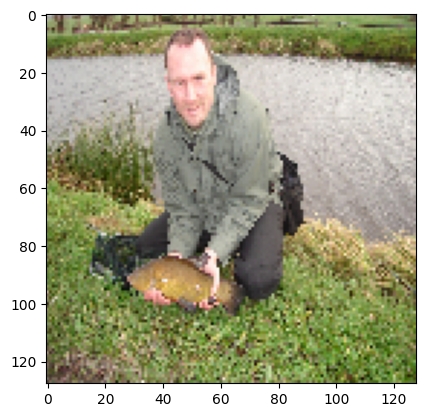

In [98]:
plt.imshow(a1[0])

# Image data loader to use in tf.data.Dataset.from_tensor_slices

In [34]:
def image_loader(image, label, shuffle=True, toption = True ):

        """
        Creates an image data loader to use using tf.data.Dataset.from_tensor_slices

        arguements: image: all image file locations
                    label: labels of the corresponding images
                    shuffle: to shuffle the images or not, default=True
                    toption: to normalize the image between 0 to 1 or -1 to 1, default=True (normalize between 0 to 1)

        returns: returns images, labels in numpy array format
        """

        num_samples = len(image) # 180

        pairs = list(zip(image, label)) # image path, corresponding indices

        if shuffle:
            random.shuffle(pairs)

        im_batch = np.array(pairs)[:, 0]
        # print(f"image batch length: {len(im_batch)}")
        lb_batch = np.array(pairs)[:, 1]
        # print(f"label batch length: {len(lb_batch)}")

        X_train = []
        y_train = []

        for (data, label) in zip(im_batch, lb_batch):
            # label = label
            y_train.append(int(label))

            array = cv2.imread(data)
            im = cv2.cvtColor(array, cv2.COLOR_BGR2RGB) / 255

            if toption:
                X_train.append(  tf.image.resize(im,[128,128])  )
            else:
                X_train.append(  (tf.image.resize(im,[128,128]))/255  )


        X_train = np.array(X_train)
        y_train = np.array(y_train)
        print(f"X shape {X_train.shape}, y shape {y_train.shape}")

        return X_train, y_train

In [40]:
# pairs = list(zip(img, label))
# len(pairs)

In [35]:
X_train, y_train = image_loader(img, label, shuffle=True)

X shape (180, 128, 128, 3), y shape (180,)


In [37]:
img_pipeline = tf.data.Dataset.from_tensor_slices((X_train, y_train)).batch(32).shuffle(5000)

In [39]:
load_image, load_label = next(iter(img_pipeline))
print(load_image, load_label)

tf.Tensor(
[[[[6.40402853e-01 6.63120389e-01 7.39629328e-01]
   [6.51309729e-01 6.78760767e-01 7.53270507e-01]
   [6.38365507e-01 6.67080343e-01 7.37576604e-01]
   ...
   [8.42248797e-01 7.98743904e-01 8.19332123e-01]
   [8.39299977e-01 8.05966616e-01 8.05124104e-01]
   [8.58371615e-01 8.18949163e-01 8.10692430e-01]]

  [[6.58601463e-01 6.83233798e-01 7.41306663e-01]
   [6.60470307e-01 6.87921286e-01 7.54633904e-01]
   [6.51754022e-01 6.79411769e-01 7.51102984e-01]
   ...
   [8.25689316e-01 7.90395200e-01 8.09589446e-01]
   [8.39361250e-01 8.00612748e-01 8.06073844e-01]
   [8.67287099e-01 8.07973325e-01 8.08946133e-01]]

  [[6.72388196e-01 6.86565578e-01 7.44584858e-01]
   [6.66260719e-01 6.89790130e-01 7.45994210e-01]
   [6.53109729e-01 6.79067135e-01 7.42593467e-01]
   ...
   [8.36351156e-01 7.90686309e-01 8.05139422e-01]
   [8.29702854e-01 7.84972429e-01 7.98154116e-01]
   [8.51700366e-01 7.96660542e-01 8.01960766e-01]]

  ...

  [[9.46691260e-03 7.50612840e-03 1.41942412e-01]
   [1

In [45]:
# onehot encoding

y_train_1 = to_categorical(y_train, len(np.unique(y_train)))



img_pipeline_1 = tf.data.Dataset.from_tensor_slices((X_train, y_train_1)).batch(32).shuffle(50000)

In [46]:
load_image, load_label = next(iter(img_pipeline_1))
print(load_image, load_label)

tf.Tensor(
[[[[0.09892411 0.07147313 0.04794372]
   [0.09527277 0.06782179 0.04429238]
   [0.07357142 0.04612044 0.01531073]
   ...
   [0.13703565 0.12134938 0.11742781]
   [0.17159185 0.15590557 0.151984  ]
   [0.269863   0.2463336  0.2463336 ]]

  [[0.08759646 0.06014548 0.03661607]
   [0.07327402 0.04582304 0.02229363]
   [0.05073087 0.02327989 0.00213671]
   ...
   [0.13258669 0.1169004  0.11297883]
   [0.22234665 0.20666037 0.2027388 ]
   [0.24997333 0.2264439  0.2264439 ]]

  [[0.1200035  0.09255251 0.0690231 ]
   [0.0979552  0.07050423 0.04697481]
   [0.07701764 0.04956665 0.01825538]
   ...
   [0.19381991 0.17813362 0.17421205]
   [0.23030922 0.21462294 0.21070138]
   [0.24656433 0.22303492 0.22303492]]

  ...

  [[0.21395096 0.16845465 0.18414092]
   [0.1452498  0.10594219 0.1200966 ]
   [0.16124196 0.14549442 0.14944662]
   ...
   [0.36058962 0.36843276 0.3252955 ]
   [0.36877322 0.37661636 0.3334791 ]
   [0.4293281  0.43717125 0.394034  ]]

  [[0.201908   0.15641169 0.172097